In [2]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
dataset=load_dataset('lukebarousse/data_jobs') 

c:\Users\pheli\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
import ast
def clean_list(skill_list):
    if pd.notna(skill_list):
       return ast.literal_eval(skill_list)
df['job_skills']=df['job_skills'].apply(clean_list)

In [11]:
df_Us= df[(df['job_country']== 'United States') & (df['job_title_short']== 'Data Analyst')]  .dropna(subset='salary_year_avg').copy()
df_Us
df_Us_exploded=df_Us.explode('job_skills')
df_Us_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [14]:
df_da_skills=df_Us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

In [16]:
df_da_skills

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [22]:
df_da_skills=df_da_skills.rename(columns={'count':'skills_count','median':'median_salary'})
df_da_skills
df_da_job_count=len(df_Us)
df_da_skills['skills_percent']=df_da_skills['skills_count']/df_da_job_count*100
df_da_skills
skills_percent=5
df_da_high_skill_demand=df_da_skills[df_da_skills['skills_percent']> skills_percent]
df_da_high_skill_demand

,skills_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


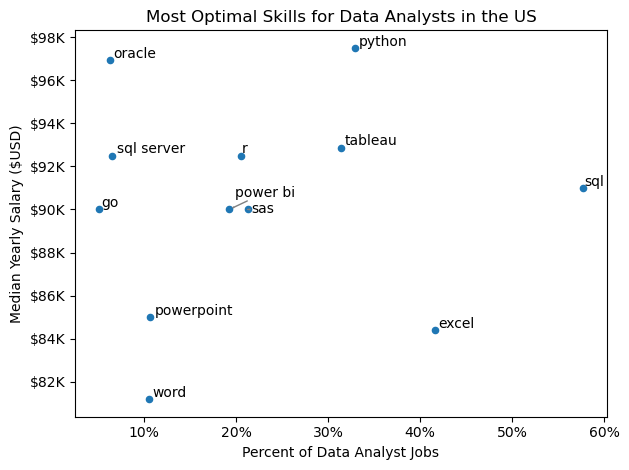

In [26]:
# adjusting text on plot

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_da_high_skill_demand.plot(kind='scatter', x='skills_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_da_high_skill_demand.index):
    texts.append(plt.text(df_da_high_skill_demand['skills_percent'].iloc[i], df_da_high_skill_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color ='gray', lw=1))

# adjusting axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

plt.tight_layout()
plt.show()

In [27]:
# creating dictionary to group technologies

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

# remove duplicates by converitng values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ssis',
  'looker',
  'msaccess',
  'cognos',
  'sharepoint',
  'powerpoint',
  'sap',
  'power bi',
  'qlik',
  'spss',
  'esquisse',
  'spreadsheet',
  'excel',
  'dax',
  'datarobot',
  'powerbi',
  'tableau',
  'nuix',
  'visio',
  'sheets',
  'ms access',
  'ssrs',
  'microstrategy',
  'sas',
  'alteryx',
  'outlook',
  'word',
  'splunk'],
 'programming': ['bash',
  'elixir',
  'mongo',
  'c',
  'sass',
  'golang',
  'go',
  'cobol',
  'objective-c',
  'r',
  'nosql',
  'lisp',
  'c#',
  'crystal',
  'sql',
  'html',
  'typescript',
  'solidity',
  'vb.net',
  'scala',
  'javascript',
  'shell',
  'julia',
  'css',
  'kotlin',
  'powershell',
  'visualbasic',
  'visual basic',
  'java',
  'haskell',
  'matlab',
  'no-sql',
  'clojure',
  'fortran',
  'ruby',
  't-sql',
  'mongodb',
  'rust',
  'lua',
  'assembly',
  'apl',
  'groovy',
  'f#',
  'delphi',
  'pascal',
  'c++',
  'php',
  'erlang',
  'sas',
  'vba',
  'ocaml',
  'python',
  'swift',
  'perl',
  'd

In [28]:
# creating dataframe from dictionary

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

# break out skills column
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ssis
0,analyst_tools,looker
0,analyst_tools,msaccess
0,analyst_tools,cognos
0,analyst_tools,sharepoint
...,...,...
9,sync,zoom
9,sync,wire
9,sync,twilio
9,sync,rocketchat


In [29]:
df_plot = df_da_high_skill_demand.merge(df_technology, left_on='job_skills', right_on='skills')

In [30]:
df_plot

,skills_count,median_salary,skills_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


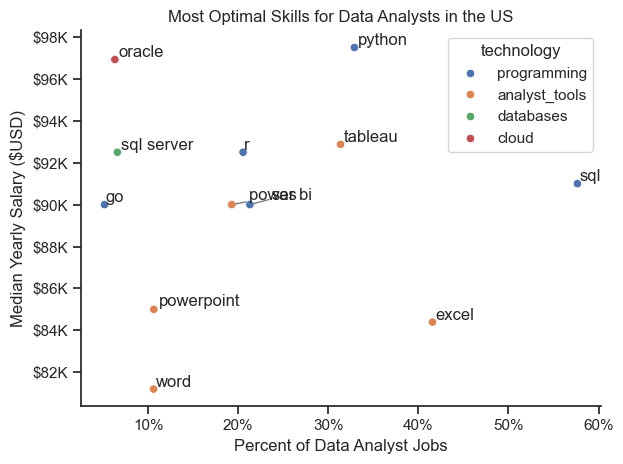

In [34]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x='skills_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_da_high_skill_demand.index):
    texts.append(plt.text(df_da_high_skill_demand['skills_percent'].iloc[i], df_da_high_skill_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color ='gray', lw=1))

# adjusting axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

plt.tight_layout()
plt.show()